In [1]:
#앞서 정확도를 확인한 딥러닝 프레임은 하나의 은닉층을 둔 아주 단순한 모델
#딥러닝은 이러한 기본 모델을 바탕으로, 프로젝트에 맞춰서 어떤 옵션을 더하고 어떤 층을 추가하느냐에 따라 성능이 좋아질 수 있다
#지금부터는 기본 딥러닝 프레임에 이미지 인식 분야에서 강력한 성능을 보이는 컨볼루션신경망(CNN)을 얹어보자

### 컨볼루션 신경망 (CNN)

In [2]:
#컨볼루션신경망은 입력된 이미지에서 다시 한번 특징을 추출하기 위해 커널(슬라이딩 윈도)을 도입하는 기법이다
#입력된 이미지값에 각 칸에 가중치값이 들어있는 마스크를 한칸씩 옮기면서 적용시킨다
#이렇게 만들어진 새로운 층을 컨볼루션(합성곱)이라고 부른다
#컨볼루션을 만들면 입력 데이터로부터 더욱 정교한 특징을 추출할 수 있다
#이러한 마스크를 여러개 만들 경우 여러 개의 컨볼루션이 만들어진다.

In [3]:
#케라스에서 컨볼루션 층을 추가하는 함수는 Conv2D()

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten

model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), input_shape=(28,28,1), activation='relu'))

In [7]:
#첫번째 인자 : 마스크를 몇개 적용할 것인지, 여러개의 마스크를 적용하면 서로 다른 컨볼루션이 여러개 나온다
#두번째 인자 : 마스크(커널) 크기, kernel_size=(행,열) 형식으로 정하며 여기서는 3X3 크기의 마스크를 사용
#세번째 인자 : Dense층과 마찬가지로 맨 처음 층에는 입력되는 값을 알려줘여한다. input_shape=(행,열,색상또는흑백)형식
#              입력이미지가 색상이면 3을, 흑백이면 1을 지정한다
#네번째 인자 : 활성화 함수를 정의

### 맥스풀링

In [8]:
#앞서 구현한 컨볼루션 층을 통해 이미지 특성을 도출하였다
#하지만 그 결과가 여전히 크고 복잡하면 이를 다시 한번 축소해야 한다. 
#이 과정을 풀링(pooling) 또는 샘플링(sampling)이라고 한다
#이러한 풀링기법에는 정해진 구역 안에서 최댓값을 뽑아내는 맥스풀링(max pooling)과 평균값을 뽑아내는 평균풀링(average pooling)이 존재
#보편적으로 사용하는 것은 맥스풀링

In [9]:
#이미지를 구역으로 나누어 최댓값을 추출함으로써 불필요한 정보를 간추린다.
#맥스풀링은 MaxPooling2D() 함수를 사용

In [12]:
model.add(MaxPooling2D(pool_size=2))

In [13]:
#pool_size는 풀링 창의 크기를 정하는 것으로, 2로 정하면 크기가 절반으로 줄어든다

#### - 드롭아웃, 플래튼

In [14]:
#노드가 많아지거나 층이 많아진다고 해서 학습이 무조건 좋아지는 것이 아니라는 점을 과적합의 의미를 통해 배웠다
#딥러닝 학습을 실행할 때 가장 중요한 것은 과적합을 얼마나 효과적으로 피해가는지에 달려있다고 해도 과언이 아니다
#그중 간단하지만 효과가 큰 기법이 바로 '드롭아웃(drop out)'기법이다. 
#드롭아웃은 은닉층에 배치된 노드 중 일부를 임의로 꺼내주는 것이다
#랜덤하게 노드를 OFF 시킴으로써 학습 데이터에 지나치게 치우쳐서 학습되는 과적합을 방지할 수 있다

In [18]:
model.add(Dropout(0.25)) #25%의 노드를 OFF

In [19]:
#이렇게 드롭아웃을 거친 모델을 앞서 만든 기본층에 연결해보자
#이때 주의할 점은 컨볼루션 층이나 맥스 풀링은 주어진 이미지를 2차원 배열인 채로 다룬다는 점이다
#이를 1차원 배열로 바꿔주어야 활성화 함수가 있는 층에서 사용할 수 있다
#따라서 Flatten() 함수를 사용해 2차원 배열을 1차원으로 바꿔준다

In [20]:
model.add(Flatten())

### 컨볼루션 신경망 (CNN) 실행하기

In [21]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten
from keras.utils import np_utils
from keras.datasets import mnist
from keras.callbacks import ModelCheckpoint, EarlyStopping

import tensorflow as tf
import numpy as np
import os
import matplotlib.pyplot as plt

In [53]:
#seed값 설정
seed = 0
np.random.seed(3)
tf.random.set_seed(3)

In [54]:
#데이터 불러오기
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 28, 28,1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28,1).astype('float32') / 255

Y_train = np_utils.to_categorical(Y_train)
Y_test = np_utils.to_categorical(Y_test)

In [55]:
#컨볼루션 신견망 설정
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,  activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [57]:
# 모델 최적화 설정
MODEL_DIR = './model/'

if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

modelpath="./model/{epoch:02d}-{val_loss:.4f}.hdf5"

checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=5)

In [58]:
# 모델의 실행
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), 
                    epochs=30, batch_size=200, verbose=0, callbacks=[early_stopping_callback,checkpointer])


Epoch 00001: val_loss improved from inf to 0.05299, saving model to ./model\01-0.0530.hdf5

Epoch 00002: val_loss improved from 0.05299 to 0.03921, saving model to ./model\02-0.0392.hdf5

Epoch 00003: val_loss improved from 0.03921 to 0.03583, saving model to ./model\03-0.0358.hdf5

Epoch 00004: val_loss improved from 0.03583 to 0.03242, saving model to ./model\04-0.0324.hdf5

Epoch 00005: val_loss did not improve from 0.03242

Epoch 00006: val_loss improved from 0.03242 to 0.03053, saving model to ./model\06-0.0305.hdf5

Epoch 00007: val_loss improved from 0.03053 to 0.02879, saving model to ./model\07-0.0288.hdf5

Epoch 00008: val_loss did not improve from 0.02879

Epoch 00009: val_loss improved from 0.02879 to 0.02745, saving model to ./model\09-0.0274.hdf5

Epoch 00010: val_loss did not improve from 0.02745

Epoch 00011: val_loss did not improve from 0.02745

Epoch 00012: val_loss did not improve from 0.02745

Epoch 00013: val_loss improved from 0.02745 to 0.02652, saving model to

In [59]:
#정확도 출력
print('\n Accuracy : %.4f' %(model.evaluate(X_test,Y_test)[1]))

313/313 [==============================] - 4s 14ms/step - loss: 0.0302 - accuracy: 0.9925

 Accuracy : 0.9925


In [60]:
#학습셋의 오차
y_loss = history.history['loss']
#테스트셋의 오차
y_vloss = history.history['val_loss']

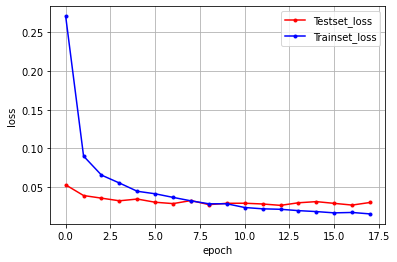

In [63]:
#그래프 그리기
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='red', label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='Trainset_loss')

#그래프에 그리드 주고 레이블표시
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show() 

In [64]:
#98.36%에서 99.25%로 정확도가 향상된것을 확인할 수 있다